<a href="https://colab.research.google.com/github/ke-wen/ke-wen/blob/main/Forecastingseasonal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proposal Brief           
The seasonal data we have chosen to study is the price of gas. We think this is seasonal data because people's demand for gas will change with the seasons, for example, people will use more gas for heating in winter.The reason we chose to do our seasonal data on the price of gas is because we rely on gas very heavily and due to the current conflict in Ukraine the price of gas has dramatically increased and as a result the price of gas has been discussed more than ever. The purpose of this time-series forecast is to highlight that we need to try to less reliant on gas and try to find other sources of energy since the price of gas has greatly increased. The source of our data came from a website of a company named Datahub. Datahub is a company that allows people to observe data over a long period of time. Datahub is trusted by governments around the world.

Source

https://datahub.io/core/natural-gas

To run this notebook, you need to create a folder call figures


# **seasonal**

In this project, I used SARIMA as the main model along with Naive Seasonal and ARIMA to identify, estimate, diagnose, and generate forecasts for seasonal data: natural gas prices. I compared the performance of these models using Mean Absolute Percentage Error (MAPE) to determine which one fit the time series data best. Overall, SARIMA showed the lowest MAPE and was the most accurate in forecasting natural gas prices. This project demonstrates the usefulness of time series models in predicting and analyzing seasonal data.

1. Import the required libs

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

2. Data loading in a dataframe

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ke-wen/ke-wen/main/dataset/natural%20gas%20data%20new.csv')
df.head()

,Month,Price
0,2016-01,2.28
1,2016-02,1.99
2,2016-03,1.73
3,2016-04,1.92
4,2016-05,1.92


In [ ]:
df.tail()

,Month,Price
55,2020-08,2.30
56,2020-09,1.92
57,2020-10,2.39
58,2020-11,2.61
59,2020-12,2.59


3. Ploting the time series

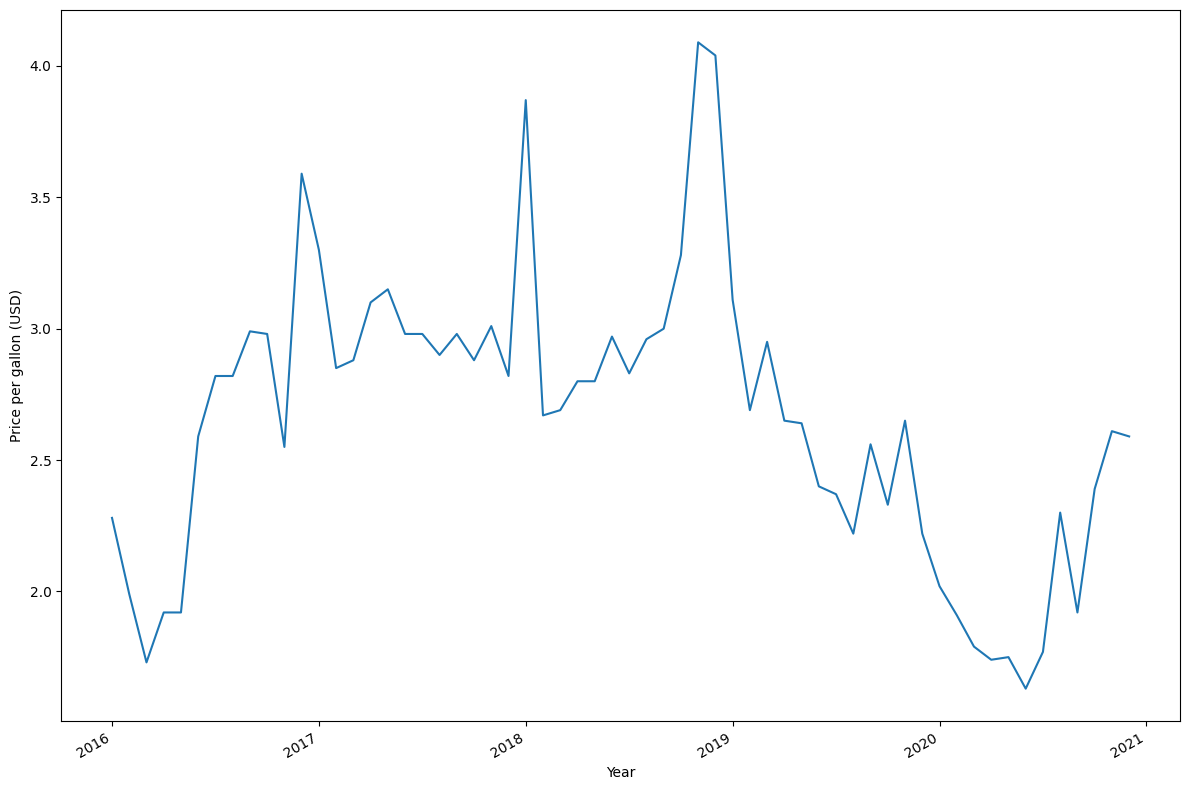

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df['Month'],df['Price'])
# Setting x-axis label
ax.set_xlabel('Year')

# Setting y-axis label
ax.set_ylabel('Price per gallon (USD)')

plt.xticks(np.arange(0,61,12), [2016,2017,2018,2019,2020,2021])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/ca_seasonal3_peixeiro.png', dpi=300)

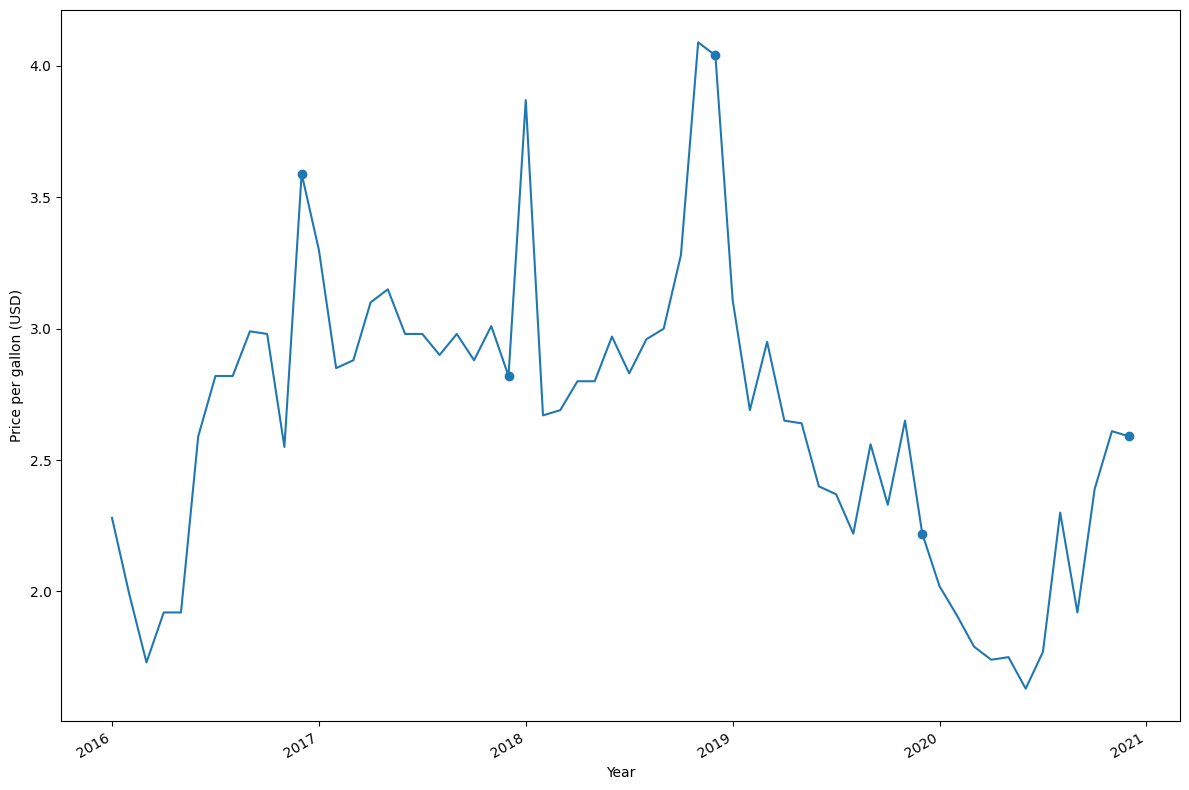

In [ ]:

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df['Month'],df['Price'], markevery=np.arange(11, 60, 12), marker='o')
# Setting x-axis label
ax.set_xlabel('Year')

# Setting y-axis label
ax.set_ylabel('Price per gallon (USD)')

plt.xticks(np.arange(0,63,12), [2016,2017,2018,2019,2020,2021])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/ca_seasonal4_peixeiro.png', dpi=300)

the seasonal period is 12 months

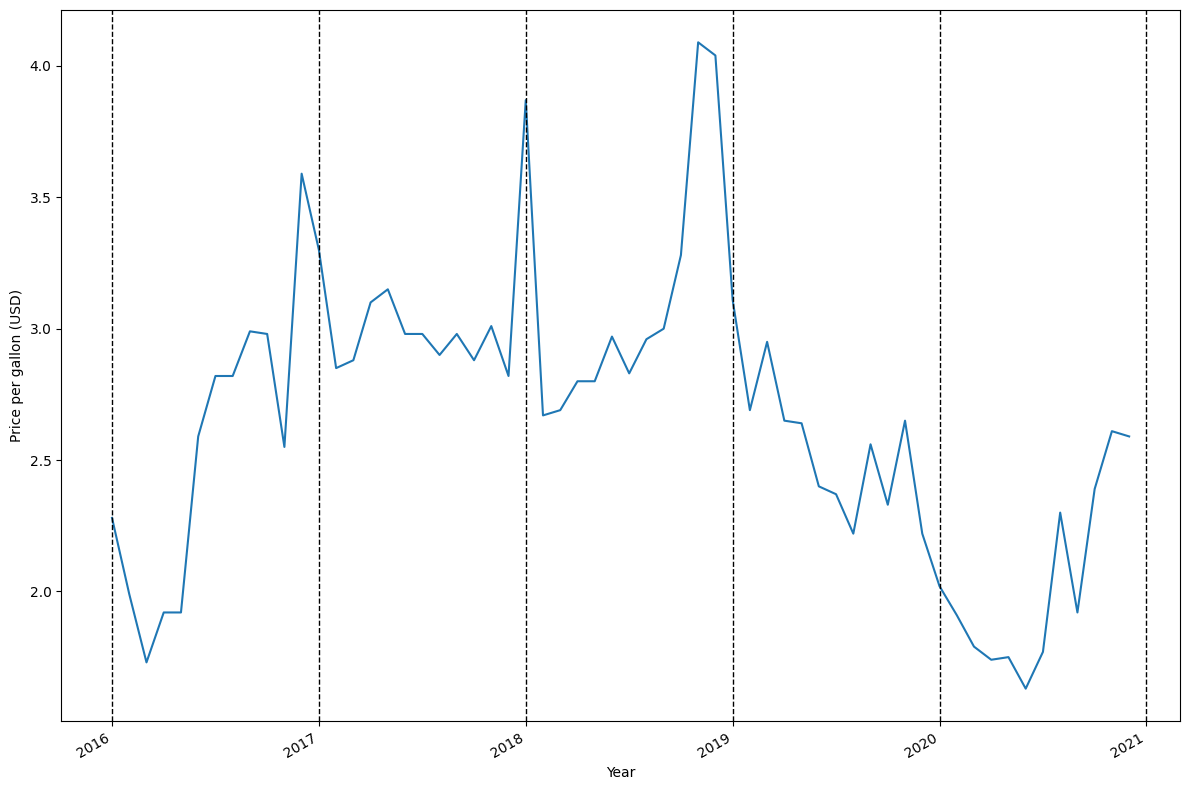

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df['Month'],df['Price'])

for i in np.arange(0, 63, 12):
    ax.axvline(x=i, linestyle='--', color='black', linewidth=1)
ax.set_xlabel('Year')
ax.set_ylabel('Price per gallon (USD)')

plt.xticks(np.arange(0, 63, 12), np.arange(2016, 2022, 1))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/ca_seasonal5_peixeiro.png', dpi=300)

Ploting the Components of a time series

In [ ]:
advanced_decomposition = STL(df.Price, period=4).fit()

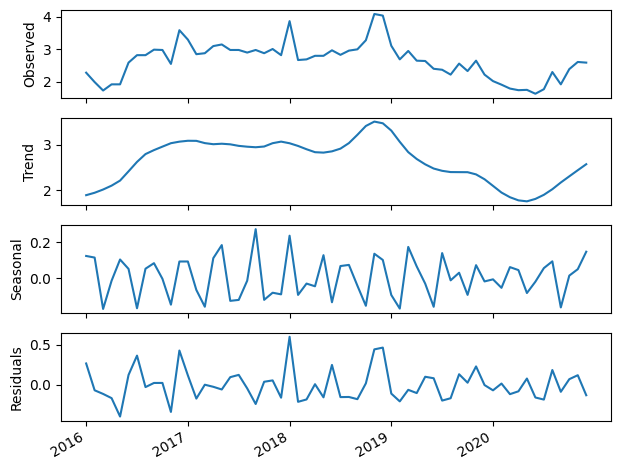

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')

plt.xticks(np.arange(0,59,12), [2016,2017,2018,2019,2020])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/ca_seasonal1_peixeiro.png', dpi=300)

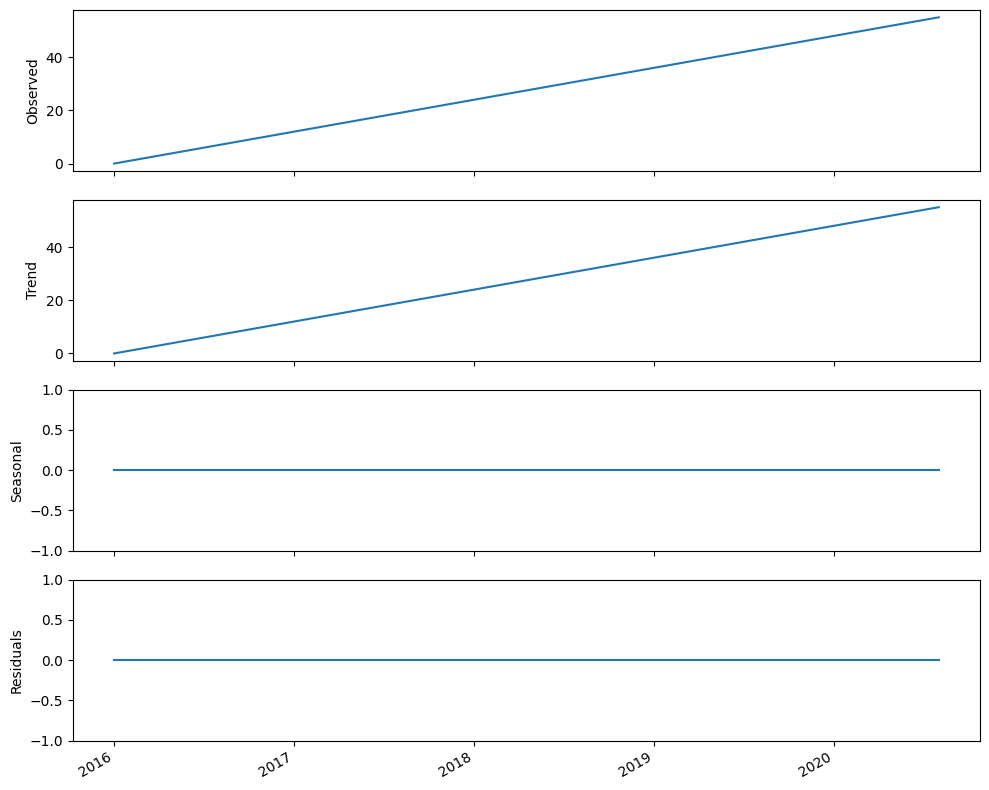

In [ ]:
linear_ts = np.arange(0, 56, 1)

decomposition = STL(linear_ts, period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax3.set_ylim(-1, 1)

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')
ax4.set_ylim(-1, 1)

plt.xticks(np.arange(0,59,12), [2016,2017,2018,2019,2020])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH08_F05_peixeiro.png', dpi=300)

Test for stationarity determines the order of differencing

In [ ]:
ad_fuller_result = adfuller(df['Price'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.7534650590185583
p-value: 0.06523453418382884


In [ ]:
df_diff = np.diff(df['Price'], n=1)

ad_fuller_result = adfuller(df_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -9.601867272651626
p-value: 1.9110729917289202e-16


In [ ]:
df_diff_seasonal_diff = np.diff(df_diff, n=12)

ad_fuller_result = adfuller(df_diff_seasonal_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -7.230719694579233
p-value: 1.9980068472569662e-10


In [ ]:
df_diff2 = np.diff(df_diff, n=1)

ad_fuller_result = adfuller(df_diff2)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -6.665239188740343
p-value: 4.735880531806167e-09


The p-value of seasonal difference after first difference is 1.9980068472569662e-10, which is small and lower then 0.05 .So the series after seasonal difference is stationary

first,I chose to take the first difference followed by the seasonal difference to continue

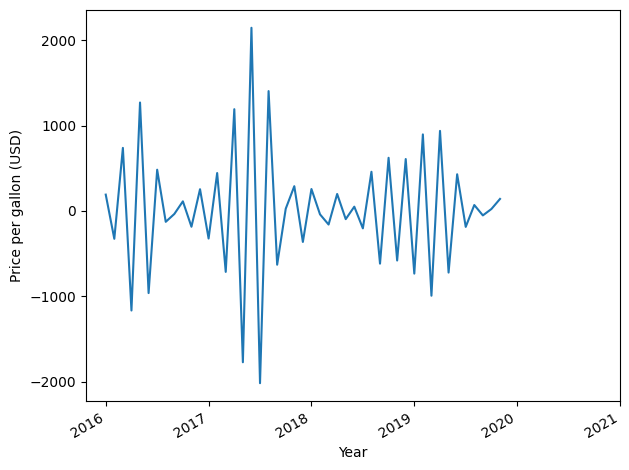

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['Month'][13:],df_diff_seasonal_diff)
ax.set_xlabel('Year')

# Setting y-axis label
ax.set_ylabel('Price per gallon (USD)')

plt.xticks(np.arange(0,61,12),np.arange(2016, 2022, 1))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/ca_seasonal7_peixeiro.png', dpi=300)

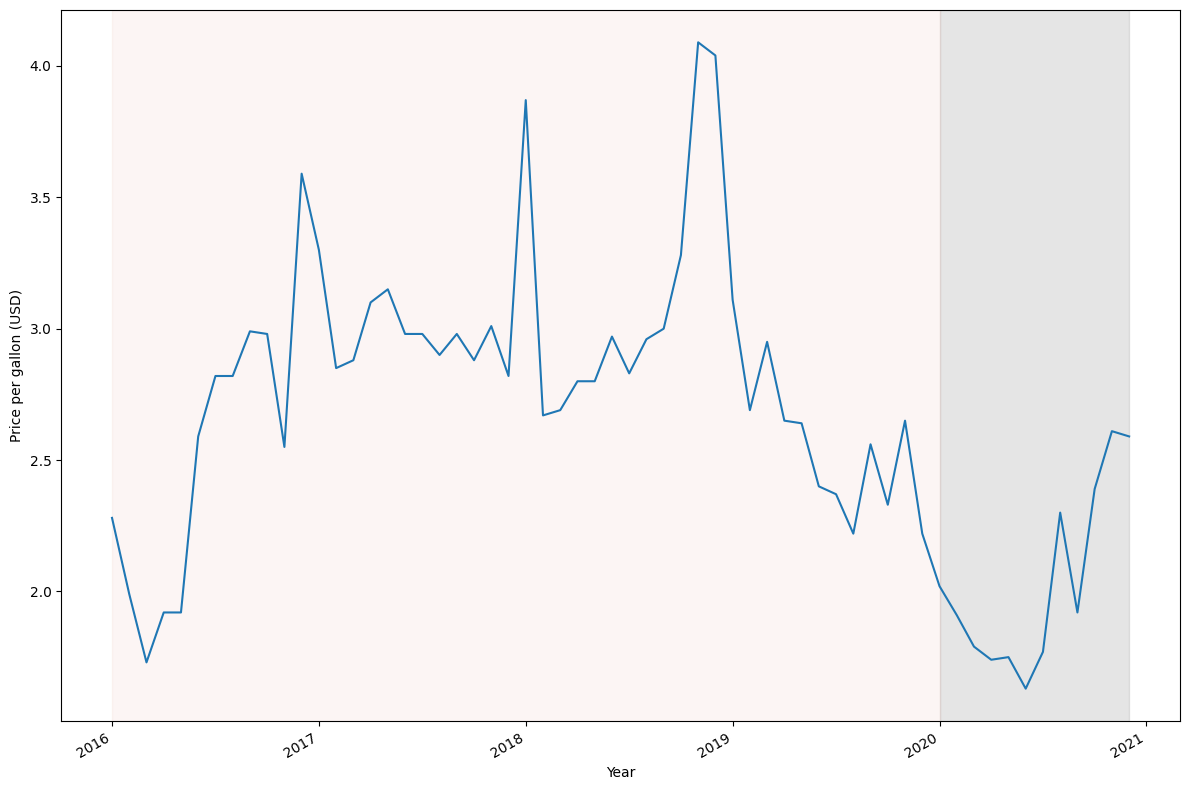

In [ ]:
# Plotting data with train/test split
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting date on x-axis and data on y-axis
ax.plot(df['Month'],df['Price'])


# Setting x-axis label
ax.set_xlabel('Year')

# Setting y-axis label
ax.set_ylabel('Price per gallon (USD)')

# Highlighting the test data in the plot
ax.axvspan(48, 59, color='#808080', alpha=0.2)
# Highlight training data
ax.axvspan(0, 48, color='#e9a296', alpha=0.1)
# Adding x-axis ticks at specified intervals
plt.xticks(np.arange(0,61,12), [2016,2017,2018,2019,2020,2021])

# Formatting x-axis labels
fig.autofmt_xdate()

# Adjusting layout
plt.tight_layout()

# Saving the plot to a file
plt.savefig('figures/ca_seasonal2_peixeiro.png', dpi=300)

Run the SARIMA function

In [ ]:
def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                endog, 
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
ps = range(0, 13, 1)
qs = range(0, 13, 1)
Ps = [0]
Qs = [0]

d = 2
D = 0
s = 12

ARIMA_order_list = list(product(ps, qs, Ps, Qs))

train = df['Price'][:-12]

ARIMA_result_df = optimize_SARIMA(train, ARIMA_order_list, d, D, s)
ARIMA_result_df

  0%|          | 0/169 [00:00<?, ?it/s]

,"(p,q,P,Q)",AIC
0,"(1, 2, 0, 0)",53.421610
1,"(0, 2, 0, 0)",53.609698
2,"(1, 1, 0, 0)",54.499461
3,"(0, 3, 0, 0)",55.029199
4,"(0, 1, 0, 0)",55.101457
...,...,...
152,"(11, 10, 0, 0)",13426.655803
153,"(10, 11, 0, 0)",13426.655803
154,"(11, 11, 0, 0)",13428.655346
155,"(12, 10, 0, 0)",13428.655682


The aic of the last one lines here is nan, but we can see from the plot that the growth of the data in 2020 at the beginning of the year is not as high as that of other years, so it is understandable that the series cannot be perfectly fitted.And this also proves that ARIMA cannot fit seasonal time series very well

In [ ]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
Ps = range(0, 4, 1)
Qs = range(0, 4, 1)

SARIMA_order_list = list(product(ps, qs, Ps, Qs))

train = df['Price'][:-12]

d = 1
D = 1
s = 12

SARIMA_result_df = optimize_SARIMA(train, SARIMA_order_list, d, D, s)
SARIMA_result_df

  0%|          | 0/256 [00:00<?, ?it/s]

,"(p,q,P,Q)",AIC
0,"(0, 1, 1, 0)",50.571778
1,"(1, 0, 1, 0)",52.341251
2,"(0, 1, 2, 0)",52.429652
3,"(0, 1, 1, 1)",52.429652
4,"(0, 2, 1, 0)",52.435582
...,...,...
251,"(2, 3, 3, 3)",66.078853
252,"(3, 3, 2, 3)",66.146574
253,"(3, 3, 3, 2)",66.453611
254,"(3, 3, 3, 3)",67.697667


ARIMA_result_df number 0 is (1, 2, 0, 0) so p = 1 q = 2,d we take 2

In [ ]:
ARIMA_model = SARIMAX(train, order=(1,2,2), simple_differencing=False)
ARIMA_model_fit = ARIMA_model.fit(disp=False)

print(ARIMA_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   48
Model:               SARIMAX(1, 2, 2)   Log Likelihood                 -22.711
Date:                Thu, 06 Apr 2023   AIC                             53.422
Time:                        13:32:12   BIC                             60.736
Sample:                             0   HQIC                            56.162
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6487      0.251      2.584      0.010       0.157       1.141
ma.L1         -1.9781      3.498     -0.565      0.572      -8.834       4.878
ma.L2          0.9966      3.527      0.283      0.7

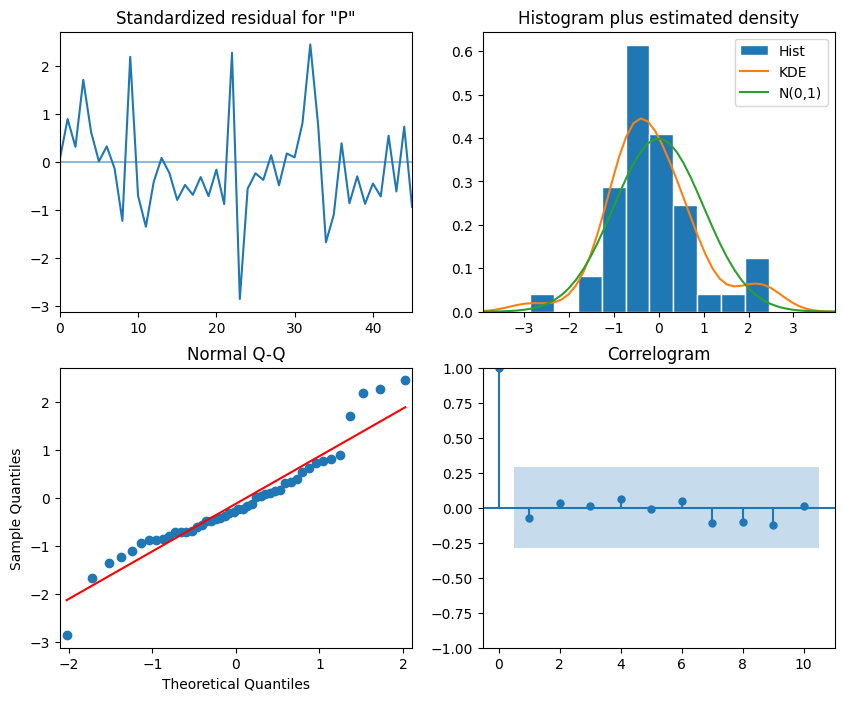

In [ ]:
ARIMA_model_fit.plot_diagnostics(figsize=(10,8));

plt.savefig('figures/ca_seasonal8_peixeiro.png', dpi=300)

In [ ]:
residuals = ARIMA_model_fit.resid

data = np.array(acorr_ljungbox(residuals, np.arange(1, 11, 1)))
lbvalue, pvalue = data[:, 0],data[:, 1]
print(pvalue)

[0.06572099 0.18298952 0.29100021 0.43992269 0.50367954 0.5845799
 0.66875662 0.76466357 0.83868033 0.75762806]


There are some problems here, the two columns of the list cannot be assigned to two variables, using other solutions I have adopted

In [ ]:
test = df.iloc[-12:]

test['naive_seasonal'] = df['Price'].iloc[36:48].values
test

,Month,Price,naive_seasonal
48,2020-01,2.02,3.11
49,2020-02,1.91,2.69
50,2020-03,1.79,2.95
51,2020-04,1.74,2.65
52,2020-05,1.75,2.64
53,2020-06,1.63,2.40
54,2020-07,1.77,2.37
55,2020-08,2.30,2.22
56,2020-09,1.92,2.56
57,2020-10,2.39,2.33


In [ ]:
ARIMA_pred = ARIMA_model_fit.get_prediction(48,59).predicted_mean

test['ARIMA_pred'] = ARIMA_pred
test

,Month,Price,naive_seasonal,ARIMA_pred
48,2020-01,2.02,3.11,2.249984
49,2020-02,1.91,2.69,2.240551
50,2020-03,1.79,2.95,2.205549
51,2020-04,1.74,2.65,2.153961
52,2020-05,1.75,2.64,2.091613
53,2020-06,1.63,2.40,2.022287
54,2020-07,1.77,2.37,1.948432
55,2020-08,2.30,2.22,1.871641
56,2020-09,1.92,2.56,1.792945
57,2020-10,2.39,2.33,1.713013


SARIMA_result_df number 0 is (0,1,1,0)so p=0,q=1,P=1,Q =0. d we take 1

In [ ]:
SARIMA_model = SARIMAX(train, order=(0, 1, 1), seasonal_order=(1,1,0,12), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)

print(SARIMA_model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Price   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                 -22.286
Date:                             Thu, 06 Apr 2023   AIC                             50.572
Time:                                     13:34:56   BIC                             55.238
Sample:                                          0   HQIC                            52.182
                                              - 48                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4511      0.243     -1.860      0.063      -0.926       0.024
ar.S.L12      -0.6214      

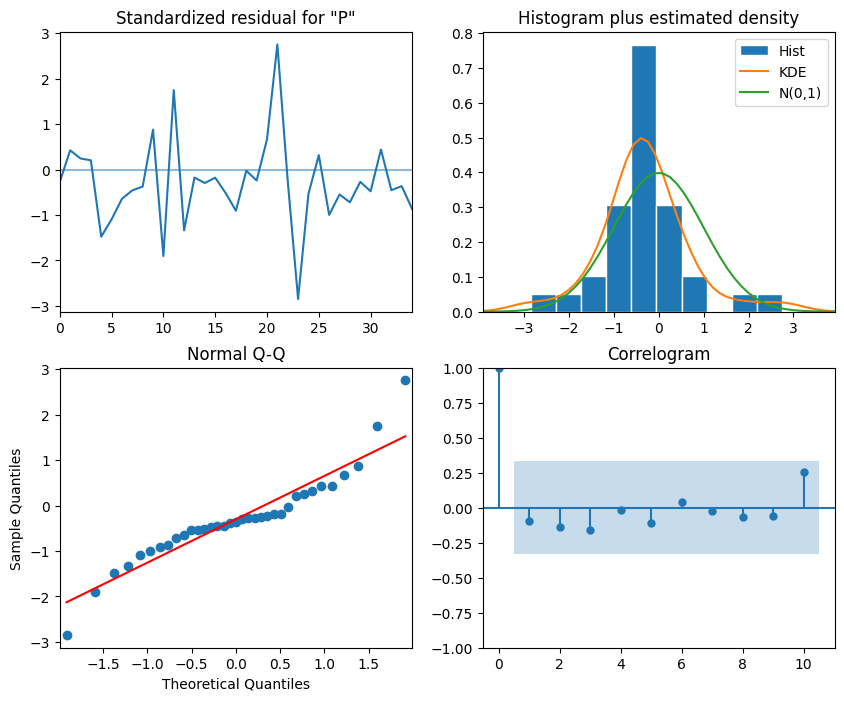

In [ ]:
SARIMA_model_fit.plot_diagnostics(figsize=(10,8));

plt.savefig('figures/ca_seasonal9_peixeiro.png', dpi=300)

In [ ]:
residuals = SARIMA_model_fit.resid

data = np.array(acorr_ljungbox(residuals, np.arange(1, 11, 1)))
lbvalue, pvalue = data[:, 0],data[:, 1]
print(pvalue)

[0.21862612 0.45918206 0.66908707 0.80931371 0.75425848 0.80030313
 0.85707122 0.90565013 0.94300191 0.96810565]


In [ ]:
SARIMA_pred = SARIMA_model_fit.get_prediction(48, 59).predicted_mean

test['SARIMA_pred'] = SARIMA_pred
test

,Month,Price,naive_seasonal,ARIMA_pred,SARIMA_pred
48,2020-01,2.02,3.11,2.249984,2.683708
49,2020-02,1.91,2.69,2.240551,1.779034
50,2020-03,1.79,2.95,2.205549,1.889903
51,2020-04,1.74,2.65,2.153961,1.844668
52,2020-05,1.75,2.64,2.091613,1.840882
53,2020-06,1.63,2.40,2.022287,1.855646
54,2020-07,1.77,2.37,1.948432,1.757295
55,2020-08,2.30,2.22,1.871641,1.781280
56,2020-09,1.92,2.56,1.792945,1.934867
57,2020-10,2.39,2.33,1.713013,2.021769


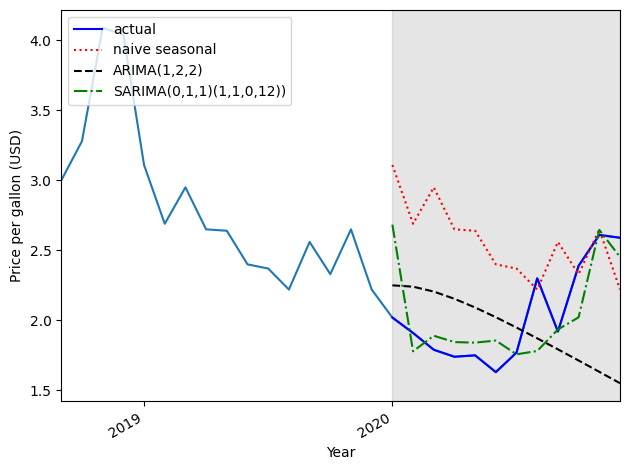

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['Month'],df['Price'])
ax.plot(test['Price'], 'b-', label='actual')
ax.plot(test['naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(test['ARIMA_pred'], 'k--', label='ARIMA(1,2,2)')
ax.plot(test['SARIMA_pred'], 'g-.', label='SARIMA(0,1,1)(1,1,0,12))')

ax.set_xlabel('Year')

# Setting y-axis label
ax.set_ylabel('Price per gallon (USD)')

ax.axvspan(48, 59, color='#808080', alpha=0.2)

ax.legend(loc=2)

plt.xticks(np.arange(0,61,12), [2016,2017,2018,2019,2020,2021])
ax.set_xlim(32,59)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH08_F13_peixeiro.png', dpi=300)

In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape_naive_seasonal = mape(test['Price'], test['naive_seasonal'])
mape_ARIMA = mape(test['Price'], test['ARIMA_pred'])
mape_SARIMA = mape(test['Price'], test['SARIMA_pred'])

print(mape_naive_seasonal, mape_ARIMA, mape_SARIMA)

33.25303831318126 21.70908057662522 9.708485293913832


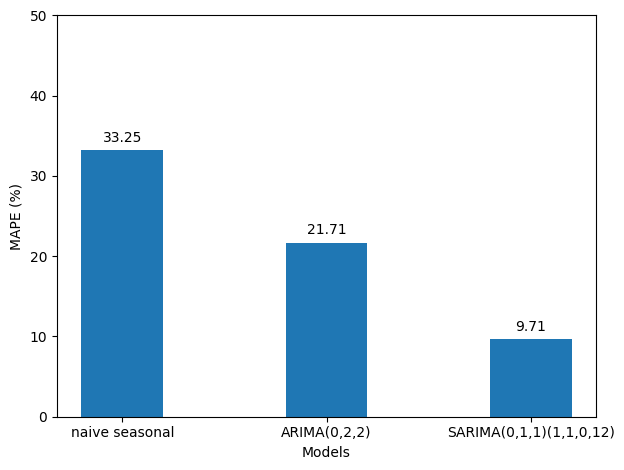

In [ ]:
fig, ax = plt.subplots()

x = ['naive seasonal', 'ARIMA(0,2,2)', 'SARIMA(0,1,1)(1,1,0,12)']
y = [mape_naive_seasonal, mape_ARIMA, mape_SARIMA]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0,50)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()

plt.savefig('figures/CH08_F14_peixeiro.png', dpi=300)

The MAPE of SARIMA is the lowest, so it is the time model closest to the natural gas time series

# **report**

**TITLE PAGE**

STUDENT NAMES: Ke Wen, Grace Omosanya and Jack Layden 

MODULE NAME: Forecasting and Scochastic Model 

LECTURER: Wael Rashwan 

**EXECUTIVE SUMMARY**

 

When it came to deciding the topic for our seasonal time series analysis, we all agreed to choose the price of gas. The reason we went with this topic is since we were determined to find out what the price of gas was before the price skyrocketing due to the current cost of living crisis and Ukrainian war. The purpose of this project is to see what time series forecasting model best fits the data we collected. The next thing to do was to decide where we were going to collect our data from. We received our seasonal data from the datahub website which the link will be provided in the reference section. The data that we gathered directly comes from the U.S. Energy Information Administration EIA which is an agency that collects and analyses data concerning data about energy. This means that the data collected is reliable and we were able to proceed with the project.  

 

After gathering the data, we then transferred the data into a excel file. From there we were able to download the excel file and use that file to produce some time series forecasting models.  For example, ETS, ARIMA, SARIMA, VAR, VARMA, or VARMAX. We did however encounter some issues when creating some of the models. For example, some of the code didn’t work so we tried other methods of code to solve the problem and in the end, we found the correct code.  

From the different time series forecasting models, we concluded that the SARIMA model fit the best with the data. From the Normal Q-Q graph we could see that the model was of good quality. But we needed to compare different models just to make sure that our SARIMA model could fit the data the best. In order to decide which model was the best fit we needed to find which model had the lowest AIC. From the results we could tell that the SARIMA model was the best fit as it had the lowest AIC of 50.572 compared to the ARIMA model’s AIC of 53.422. From this we were able to suggest that the SARIMA model was the best fit for seasonal data. From the figures below we see the SARIMA model compared to other models and how we got to the conclusion that the best fit for the model. 

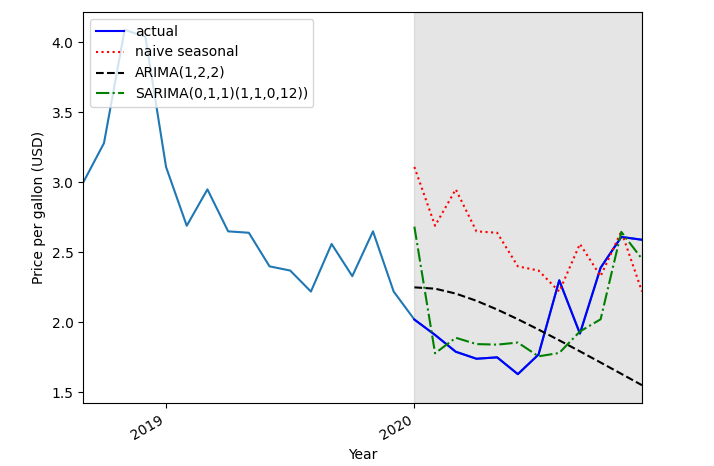

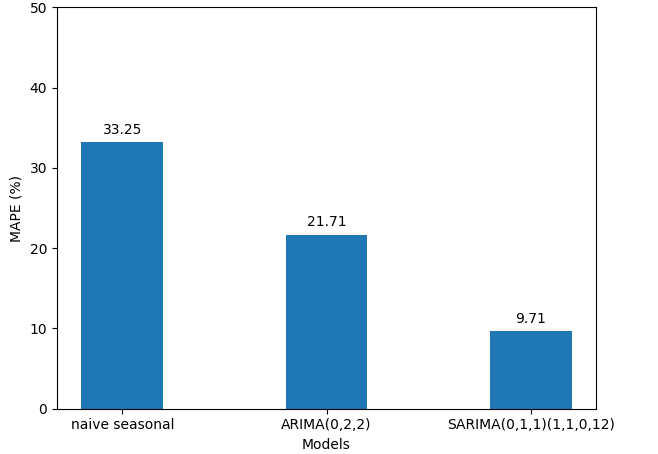

**REPORT**

My group and I decided to base our seasonal time series analysis on the price of gas. The reason we chose this topic is because we saw a problem with the price of gas, and the problem is that the price is skyrocketing. The purpose of our project was to see which time series forecasting model would suit the data the best. The next thing to do choose where to collect our data from. We gathered the data from a website named datahub. This website got their data on the price of gas from the U.S. Energy Information Administration. We picked this amount of time as it gave us an opportunity to get better understanding of what the price of gas before the Ukranian war and the current cost of living crisis.  One thing that had an impact on our observation period was the Covid-19 pandemic. Since everyone was home a lot more home utilities were used more. This is the reason why there was a dramatic increase at the end of our observational period. The very first graph made was Figure 1.0 this was made from gathered data from the excel file. This graph  shows the overall time series model of our data. 

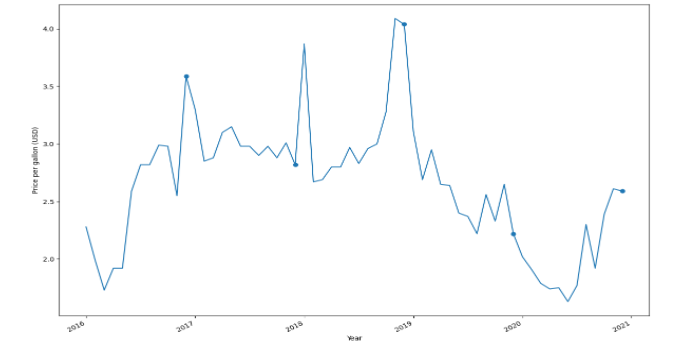 Fig 1.0

Following on from that we decomposed the time series data into components. This allows us to better understand the patterns of the data that might not be apparent upon looking at the data first time around. Figure 1.1 shows each of the four components. The observed chart shows the time series data as it is. In the trend section of these graphs, you can see overall movement of the price of gas over the chosen time period. The seasonal graph shows the seasonal variation over each observational period. The residuals graph tells us what can’t be explained by either the trend or seasonal components. It shows what changes need to be made to both trend and seasonal components. 

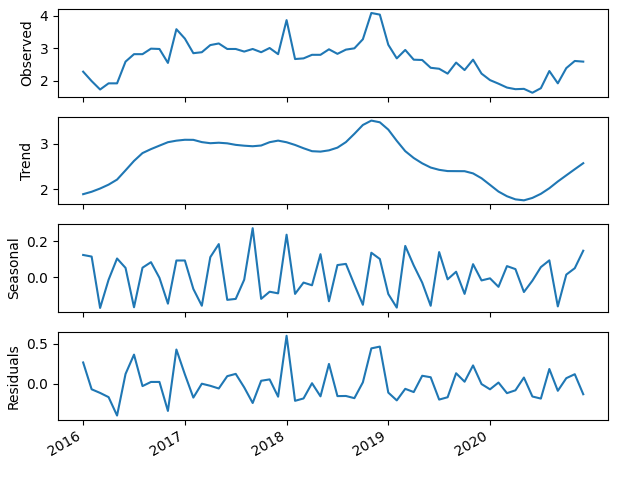 Fig 1.1

Next, we needed to find out if the data is stationary or not. The first step is getting the p-value. To get the p-value we needed to perform a ADF test. Once we got a p-value greater than 0.05 we were able to make our series stationary. We did this by applying a first-order differencing. Which is what you can see in figure 1.2. 

  

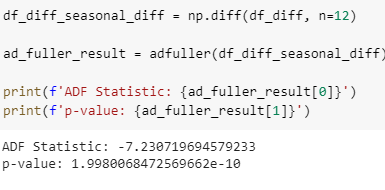 Fig 1.2

Fig 1.3 shows the splitting the data into training and testing. From here we will be able to test which time series model fits best as the naïve forecast serves as a baseline. 

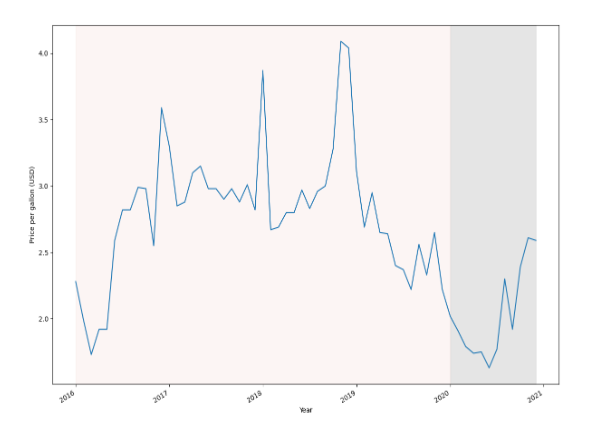 Fig 1.3

 From the Normal Q-Q graph in fig 1.4 we can assess the overall goodness of fit for the ARIMA model. Since the residuals are quite similar to the normal distribution and aren’t curved in shape, we can therefore state that the model is in good shape. The correlogram shows that the correlation of the ARIMA model is statistically correlated. 

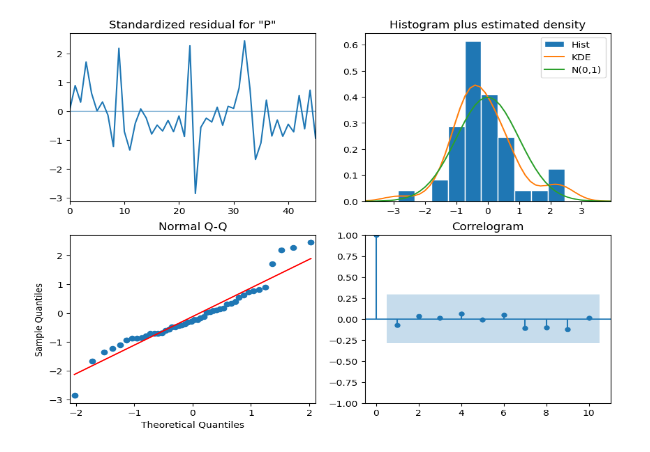 Fig 1.4

Like the ARIMA Model, the Normal Q-Q graph in fig 1.5 for the SARIMA Model is shows us that the residuals are similar to the normal distribution as the residuals are along the straight line. Also, we see in the correlogram that there are no lags which indicates a strong correlation. 





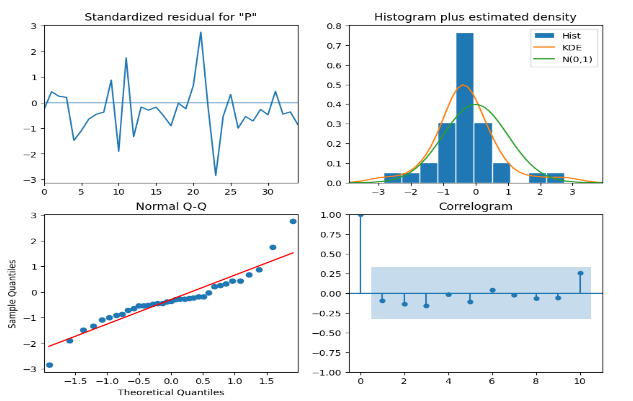 Fig 1.5

But to decide which is the better model we need to look at the AIC results for both models. 

The AIC measures the quality of each model in comparison to other models. The model that has the lowest AIC is the better model suited for our data. The AIC is found by applying the moving average process and as a result prints out a summary table which can be seen for both models in figures 1.6 and 1.7. 

Comparing the AIC for the ARIMA Model and the SARIMA Model I can see that the AIC in the SARIMA Model (50.572) is lower than the AIC in the ARIMA Model (53.422). Which means that the SAIRMA is the better model. 

 

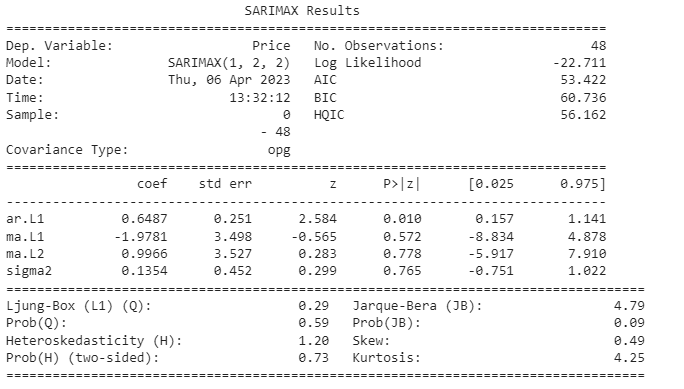 Fig 1.6

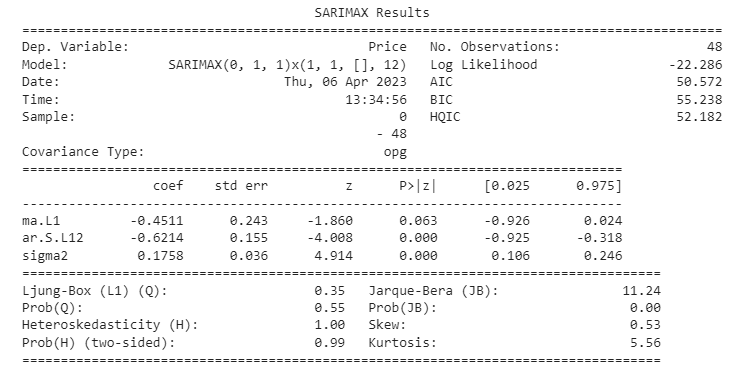 Fig 1.7



Figures 1.6 and 1.7 show the AIC for both Models. From this we know that the SARIMA is the right model as it has the lowest AIC of 50.572. 

We can see from figure 1.8 and figure 1.9 that the SARIMA model would fit the time series the best.  The MAPE model suggests that the SARIMA as it has the lowest percentage error of 9.71%. Therefore, we will use the SARIMA model for the prediction of natural gas prices.

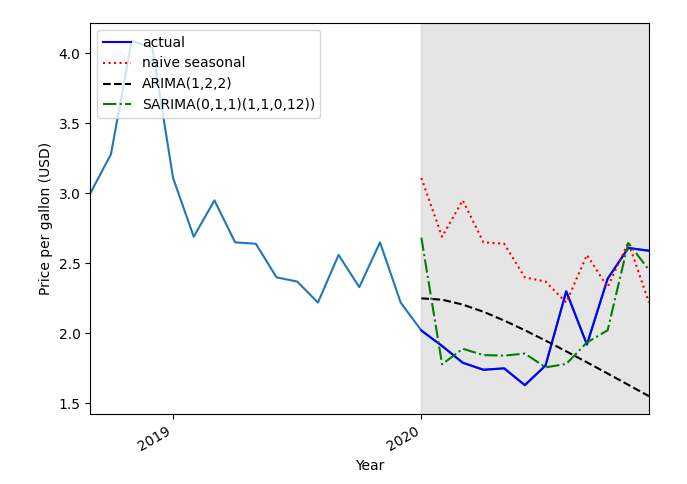 Fig 1.8

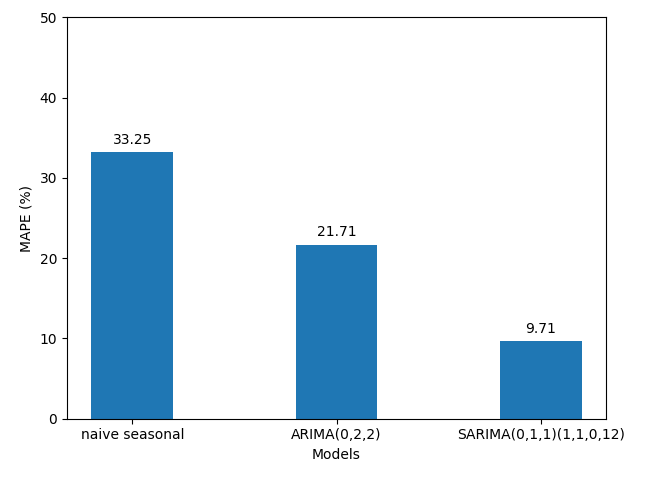Fig 1.9